In [1]:
import pandas as pd

df =pd.read_csv("C:/Users/Admin/Downloads/allstatecombined_data.csv")

In [2]:
pd.set_option("display.max_columns", None)


In [4]:
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to categorical
df[object_columns] = df[object_columns].astype('category')

# Verify the changes
print(df.dtypes)

State Code                             category
District Code                          category
India/States                           category
Division                               category
Group                                  category
Class                                  category
NIC Name                               category
Main Workers - Total -  Persons           int64
Main Workers - Total - Males              int64
Main Workers - Total - Females            int64
Main Workers - Rural -  Persons           int64
Main Workers - Rural - Males              int64
Main Workers - Rural - Females            int64
Main Workers - Urban -  Persons           int64
Main Workers - Urban - Males              int64
Main Workers - Urban - Females            int64
Marginal Workers - Total -  Persons       int64
Marginal Workers - Total - Males          int64
Marginal Workers - Total - Females        int64
Marginal Workers - Rural -  Persons       int64
Marginal Workers - Rural - Males        

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the NIC Name column
df['NIC Name Encoded'] = label_encoder.fit_transform(df['NIC Name'])

print(df[['NIC Name', 'NIC Name Encoded']])


                                                 NIC Name  NIC Name Encoded
0                                                   Total               543
1       Crop and animal production, hunting and relate...                69
2                          Growing of non-perennial crops               119
3       Growing of cereals (except rice), leguminous c...               115
4                                         Growing of rice               126
...                                                   ...               ...
193119  Activities of extraterritorial organizations a...                11
193120                                              Blank                36
193121                                              Blank                36
193122          Incomplete description/ Wrongly Classifed               139
193123          Incomplete description/ Wrongly Classifed               139

[193124 rows x 2 columns]


In [9]:
#data cleaning
def clean_code(text):
    text = text.replace('`', '').strip()  # Remove backticks and trim spaces
    text = text.lstrip('0')  # Remove leading zeros
    return text if text else '0'  # Return '0' if the result is empty

# Apply the cleaning function to the relevant columns
columns_to_clean = ['State Code', 'District Code', 'Division', 'Group', 'Class']
for column in columns_to_clean:
    df[column] = df[column].apply(clean_code)

print(df)

       State Code District Code           India/States Division Group Class  \
0               8             0      STATE - RAJASTHAN        0     0     0   
1               8             0      STATE - RAJASTHAN        1     0     0   
2               8             0      STATE - RAJASTHAN        1    11     0   
3               8             0      STATE - RAJASTHAN        1    11   111   
4               8             0      STATE - RAJASTHAN        1    11   112   
...           ...           ...                    ...      ...   ...   ...   
193119         21           399  District - Malkangiri       99     0     0   
193120         21           399  District - Malkangiri       99   991     0   
193121         21           399  District - Malkangiri       99   991  9910   
193122         21           399  District - Malkangiri       99   992     0   
193123         21           399  District - Malkangiri       99   992  9920   

                                                 NI

In [34]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Set the NLTK data path
nltk.data.path.append('C:\\vscode\\nltk_data')

# Download required resources if not already downloaded
nltk.download('punkt', download_dir='C:\\vscode\\nltk_data')
nltk.download('stopwords', download_dir='C:\\vscode\\nltk_data')

[nltk_data] Downloading package punkt to C:\vscode\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\vscode\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
import nltk

# Set the NLTK data path to the base directory
nltk.data.path.append('C:\\vscode\\nltk_data')

# Download the necessary resources
nltk.download('punkt')
nltk.download('punkt_tab')

# Test the tokenizer
try:
    words = nltk.tokenize.word_tokenize("This is a test.")
    print("Punkt tokenizer loaded successfully:", words)
except LookupError as e:
    print("Punkt tokenizer could not be loaded:", e)

Punkt tokenizer loaded successfully: ['This', 'is', 'a', 'test', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [41]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Set the NLTK data path to the base directory
nltk.data.path.append('C:\\vscode\\nltk_data')

# Ensure you have the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def clean_nic_name(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the cleaning function to the NIC Name column
df['Cleaned NIC Name'] = df['NIC Name'].apply(clean_nic_name)

# Display the original and cleaned columns
print(df[['NIC Name', 'Cleaned NIC Name']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                 NIC Name  \
0                                                   Total   
1       Crop and animal production, hunting and relate...   
2                          Growing of non-perennial crops   
3       Growing of cereals (except rice), leguminous c...   
4                                         Growing of rice   
...                                                   ...   
193119  Activities of extraterritorial organizations a...   
193120                                              Blank   
193121                                              Blank   
193122          Incomplete description/ Wrongly Classifed   
193123          Incomplete description/ Wrongly Classifed   

                                     Cleaned NIC Name  
0                                               total  
1           crop anim product hunt relat servic activ  
2                                grow nonperenni crop  
3       grow cereal except rice legumin cro

In [42]:
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,NIC Name Encoded,Cleaned NIC Name
0,8,0,STATE - RAJASTHAN,0,0,0,Total,9017944,7594737,1423207,4469555,3664793,804762,4548389,3929944,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490,543,total
1,8,0,STATE - RAJASTHAN,1,0,0,"Crop and animal production, hunting and relate...",450766,201572,249194,391263,161879,229384,59503,39693,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882,69,crop anim product hunt relat servic activ
2,8,0,STATE - RAJASTHAN,1,11,0,Growing of non-perennial crops,12876,10547,2329,5644,4328,1316,7232,6219,1013,9562,4051,5511,8147,3295,4852,1415,756,659,119,grow nonperenni crop
3,8,0,STATE - RAJASTHAN,1,11,111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,5195,3987,1208,6866,5924,942,9085,3883,5202,7777,3161,4616,1308,722,586,115,grow cereal except rice legumin crop oil seed
4,8,0,STATE - RAJASTHAN,1,11,112,Growing of rice,79,71,8,48,42,6,31,29,2,13,4,9,11,2,9,2,2,0,126,grow rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193119,21,399,District - Malkangiri,99,0,0,Activities of extraterritorial organizations a...,574,315,259,498,277,221,76,38,38,1222,294,928,1176,286,890,46,8,38,11,activ extraterritori organ bodi
193120,21,399,District - Malkangiri,99,991,0,Blank,435,266,169,379,232,147,56,34,22,586,202,384,558,198,360,28,4,24,36,blank
193121,21,399,District - Malkangiri,99,991,9910,Blank,435,266,169,379,232,147,56,34,22,586,202,384,558,198,360,28,4,24,36,blank
193122,21,399,District - Malkangiri,99,992,0,Incomplete description/ Wrongly Classifed,139,49,90,119,45,74,20,4,16,636,92,544,618,88,530,18,4,14,139,incomplet descript wrongli classif


In [43]:
df.to_csv('C:/vscode/cleaned_nic_data.csv', index=False)


Most common words: [('activ', 59441), ('manufactur', 47535), ('product', 20408), ('servic', 13286), ('sale', 13143), ('retail', 12526), ('nec', 9814), ('equip', 9813), ('transport', 9350), ('special', 8734)]


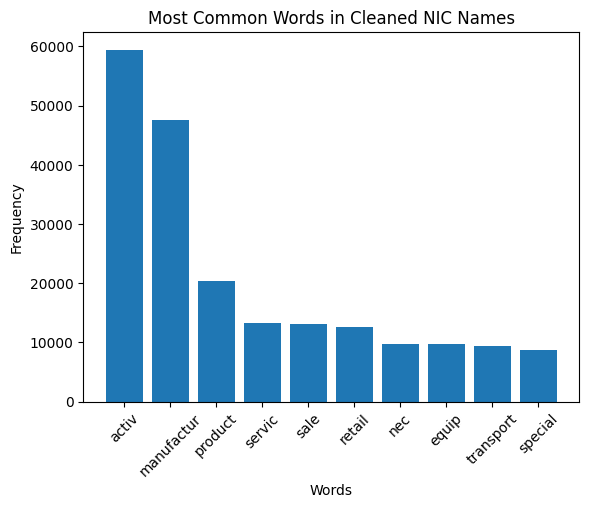

In [44]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all cleaned NIC names into a single string
all_words = ' '.join(df['Cleaned NIC Name'])

# Split the string into individual words
word_list = all_words.split()

# Count the frequency of each word
word_counts = Counter(word_list)

# Get the most common words
common_words = word_counts.most_common(10)

# Print the most common words
print("Most common words:", common_words)

# Plot the frequency of the most common words
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('Most Common Words in Cleaned NIC Names')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [45]:
df = df.drop(columns=['NIC Name'])


In [46]:
df

,State Code,District Code,India/States,Division,Group,Class,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,NIC Name Encoded,Cleaned NIC Name
0,8,0,STATE - RAJASTHAN,0,0,0,9017944,7594737,1423207,4469555,3664793,804762,4548389,3929944,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490,543,total
1,8,0,STATE - RAJASTHAN,1,0,0,450766,201572,249194,391263,161879,229384,59503,39693,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882,69,crop anim product hunt relat servic activ
2,8,0,STATE - RAJASTHAN,1,11,0,12876,10547,2329,5644,4328,1316,7232,6219,1013,9562,4051,5511,8147,3295,4852,1415,756,659,119,grow nonperenni crop
3,8,0,STATE - RAJASTHAN,1,11,111,12061,9911,2150,5195,3987,1208,6866,5924,942,9085,3883,5202,7777,3161,4616,1308,722,586,115,grow cereal except rice legumin crop oil seed
4,8,0,STATE - RAJASTHAN,1,11,112,79,71,8,48,42,6,31,29,2,13,4,9,11,2,9,2,2,0,126,grow rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193119,21,399,District - Malkangiri,99,0,0,574,315,259,498,277,221,76,38,38,1222,294,928,1176,286,890,46,8,38,11,activ extraterritori organ bodi
193120,21,399,District - Malkangiri,99,991,0,435,266,169,379,232,147,56,34,22,586,202,384,558,198,360,28,4,24,36,blank
193121,21,399,District - Malkangiri,99,991,9910,435,266,169,379,232,147,56,34,22,586,202,384,558,198,360,28,4,24,36,blank
193122,21,399,District - Malkangiri,99,992,0,139,49,90,119,45,74,20,4,16,636,92,544,618,88,530,18,4,14,139,incomplet descript wrongli classif


In [48]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the NIC Name column
df['Cleaned NIC Name Encoded'] = label_encoder.fit_transform(df['Cleaned NIC Name'])

print(df[['Cleaned NIC Name', 'Cleaned NIC Name Encoded']])

                                     Cleaned NIC Name  \
0                                               total   
1           crop anim product hunt relat servic activ   
2                                grow nonperenni crop   
3       grow cereal except rice legumin crop oil seed   
4                                           grow rice   
...                                               ...   
193119                activ extraterritori organ bodi   
193120                                          blank   
193121                                          blank   
193122             incomplet descript wrongli classif   
193123             incomplet descript wrongli classif   

        Cleaned NIC Name Encoded  
0                            515  
1                             72  
2                            125  
3                            121  
4                            129  
...                          ...  
193119                        11  
193120                        37  


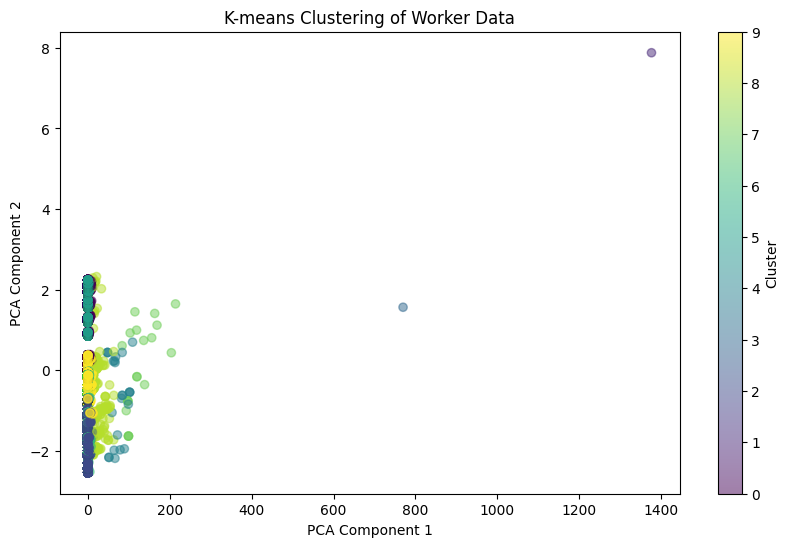

                 India/States State Code District Code  \
0           STATE - RAJASTHAN          8             0   
1           STATE - RAJASTHAN          8             0   
2           STATE - RAJASTHAN          8             0   
3           STATE - RAJASTHAN          8             0   
4           STATE - RAJASTHAN          8             0   
...                       ...        ...           ...   
193119  District - Malkangiri         21           399   
193120  District - Malkangiri         21           399   
193121  District - Malkangiri         21           399   
193122  District - Malkangiri         21           399   
193123  District - Malkangiri         21           399   

        Main Workers - Total -  Persons  Main Workers - Total - Males  \
0                               9017944                       7594737   
1                                450766                        201572   
2                                 12876                         10547   
3          

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K-means clustering
# Select numerical columns for clustering
num_columns = [
    'State Code', 'District Code', 'Main Workers - Total -  Persons', 
    'Main Workers - Total - Males', 'Main Workers - Total - Females',
    'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
    'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
    'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
    'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males',
    'Marginal Workers - Total - Females', 'Marginal Workers - Rural -  Persons',
    'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females',
    'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males',
    'Marginal Workers - Urban - Females', 'Cleaned NIC Name Encoded'
]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df[num_columns])

# Apply K-means clustering
k = 10  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Dimensionality reduction for PCA
pca = PCA(n_components=13)  # Keep 13 components
X_reduced = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_reduced, columns=[f'PCA{i+1}' for i in range(13)])
pca_df['Cluster'] = df['Cluster']

# Optional: You can visualize only the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Worker Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Display the DataFrame with clusters
print(df[['India/States'] + num_columns + ['Cluster']])

In [53]:
df.to_csv('C:/vscode/after_K-means.csv', index=False)


In [52]:
df

,State Code,District Code,India/States,Division,Group,Class,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,NIC Name Encoded,Cleaned NIC Name,Cleaned NIC Name Encoded,Cluster
0,8,0,STATE - RAJASTHAN,0,0,0,9017944,7594737,1423207,4469555,3664793,804762,4548389,3929944,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490,543,total,515,3
1,8,0,STATE - RAJASTHAN,1,0,0,450766,201572,249194,391263,161879,229384,59503,39693,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882,69,crop anim product hunt relat servic activ,72,4
2,8,0,STATE - RAJASTHAN,1,11,0,12876,10547,2329,5644,4328,1316,7232,6219,1013,9562,4051,5511,8147,3295,4852,1415,756,659,119,grow nonperenni crop,125,2
3,8,0,STATE - RAJASTHAN,1,11,111,12061,9911,2150,5195,3987,1208,6866,5924,942,9085,3883,5202,7777,3161,4616,1308,722,586,115,grow cereal except rice legumin crop oil seed,121,2
4,8,0,STATE - RAJASTHAN,1,11,112,79,71,8,48,42,6,31,29,2,13,4,9,11,2,9,2,2,0,126,grow rice,129,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193119,21,399,District - Malkangiri,99,0,0,574,315,259,498,277,221,76,38,38,1222,294,928,1176,286,890,46,8,38,11,activ extraterritori organ bodi,11,9
193120,21,399,District - Malkangiri,99,991,0,435,266,169,379,232,147,56,34,22,586,202,384,558,198,360,28,4,24,36,blank,37,9
193121,21,399,District - Malkangiri,99,991,9910,435,266,169,379,232,147,56,34,22,586,202,384,558,198,360,28,4,24,36,blank,37,9
193122,21,399,District - Malkangiri,99,992,0,139,49,90,119,45,74,20,4,16,636,92,544,618,88,530,18,4,14,139,incomplet descript wrongli classif,143,9
